## Explorar datos

The dataset for this exercise is the bank dataset, courtesy of S. Moro,
P. Cortez and P. Rita: A Data-Driven Approach to Predict the Success of
Bank Telemarketing.
It is from the UCI Machine Learning Repository: https://packt.live/2MItXEl
and can be downloaded from our GitHub at: https://packt.live/2Wav1nJ.

In [ ]:
import pandas as pd

In [ ]:
file_url = 'bank-full.csv'

In [ ]:
# Loading the data using pandas
bankData = pd.read_csv(file_url, sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Printing the shape of the data 
print(bankData.shape)

(45211, 17)


In [ ]:
# Summarizing the statistics of the numerical raw data
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Como se ve en la forma de los datos, el conjunto de datos tiene 45211 ejemplos con 17 variables. El conjunto de variables tiene variables categóricas y numéricas. 

Las estadísticas de resumen anteriores se obtienen solo para los datos numéricos.

### Prueba de hipótesis de negocios para edad vs propensión para un préstamo a plazo
El objetivo de este ejercicio es definir una hipótesis para comprobar la propensión de un individuo a comprar un plan de depósito a plazo frente a su edad. Usaremos un gráfico lineal para este ejercicio.

In [ ]:
import altair as alt

In [ ]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
filter_mask = bankData['y'] == 'yes'
bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()
bankSub1.head()

,age,agegrp
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


In [ ]:
# Visualising the relationship using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [ ]:
# Getting another perspective
ageTot = bankData.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [ ]:
# Getting all the details in one place
ageProp = bankData.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [ ]:
# Merging both the data frames
ageComb = pd.merge(ageProp, ageTot,left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [ ]:
# Visualising the relationship using altair
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

In [ ]:
# Getting the total counts under each job category
jobTot = bankData.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [ ]:
# Getting all the details in one place
jobProp = bankData.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()

In [ ]:
# Merging both the data frames
jobComb = pd.merge(jobProp, jobTot, on=['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100

jobComb.head()

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


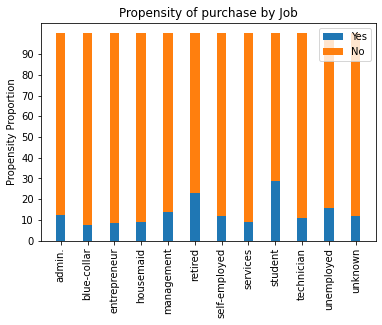

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create seperate data frames for Yes and No
jobcombYes = jobComb[jobComb['y'] == 'yes']
jobcombNo = jobComb[jobComb['y'] == 'no']

# Get the length of the xaxis labels 
xlabels = jobTot['job'].nunique()

# Get the proportion values 
jobYes = jobcombYes['catProp'].unique()
jobNo = jobcombNo['catProp'].unique()

# Arrange the indexes of x asix
ind = np.arange(xlabels)

# Get the width of each bar
width = 0.35  

# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width,bottom=jobYes)

plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels 
plt.xticks(rotation=90)
plt.show()